<a href="https://colab.research.google.com/github/bemadi/Project-2/blob/main/Project_2_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the Quality of Red and White Wines**

# **Data Cleaning**

In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [207]:
df = pd.read_csv('/content/drive/MyDrive/Data/winequality.csv')

In [208]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Red,5


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  Color                 6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [210]:
df.duplicated().sum()

1177

In [211]:
df.drop_duplicates(inplace=True)

In [212]:
df.duplicated().sum()

0

In [213]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# **Visualizations**

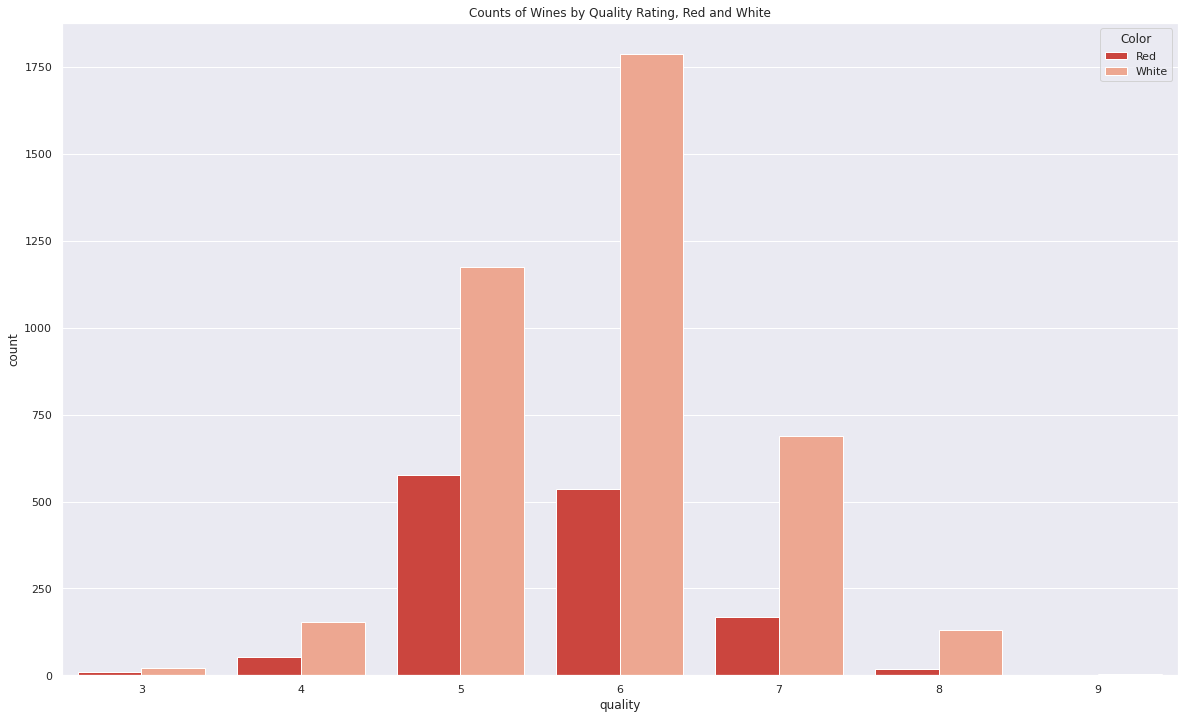

In [214]:
sns.countplot(data=df, x='quality', hue = 'Color', palette="Reds_r")
plt.title('Counts of Wines by Quality Rating, Red and White');

In [215]:
df.loc[df['quality'] == 9, :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Color,quality
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,White,9
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,White,9
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,White,9
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,White,9
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,White,9


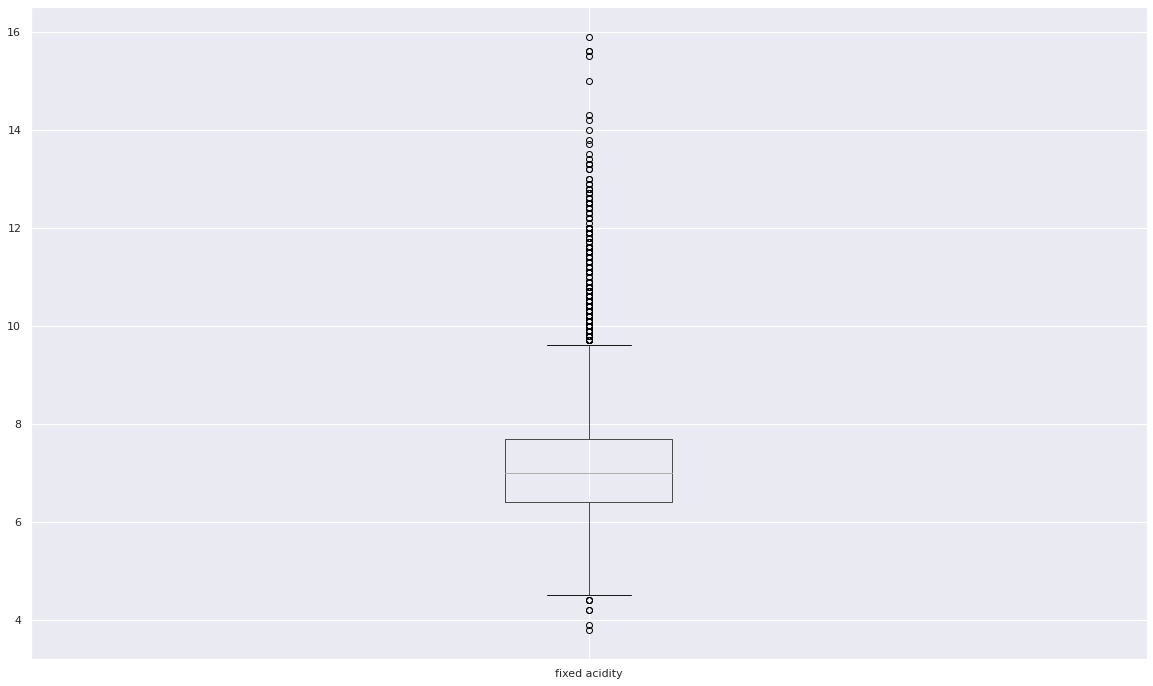

In [216]:
df.boxplot(column = 'fixed acidity');

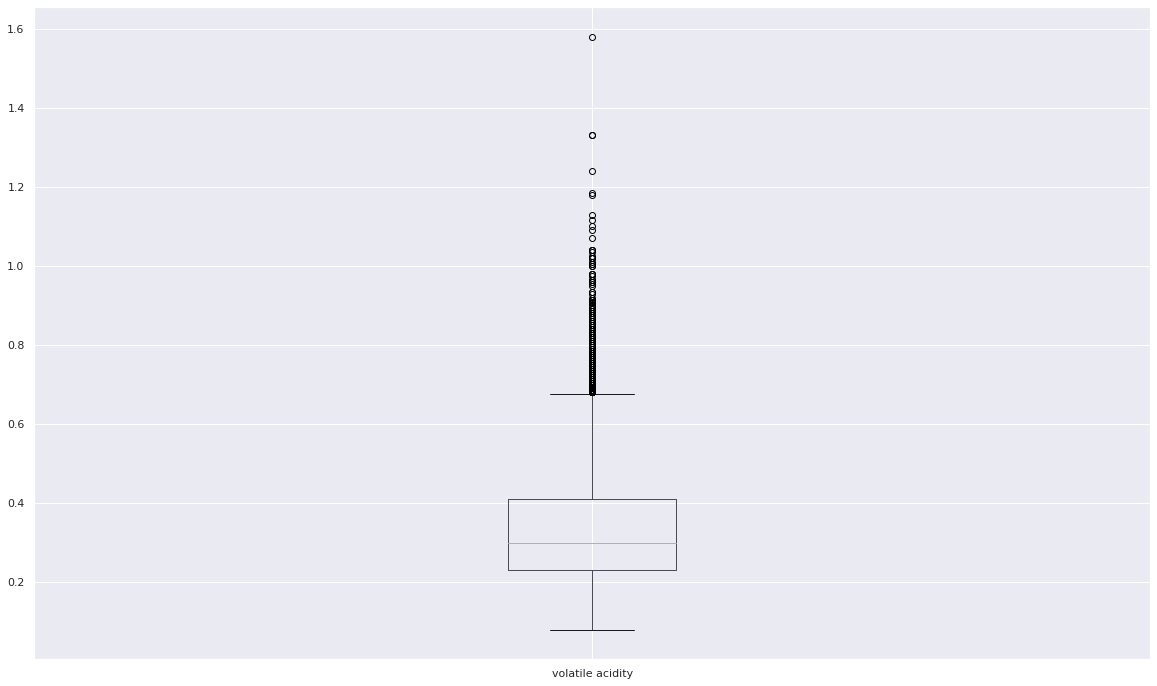

In [217]:
df.boxplot(column = 'volatile acidity');

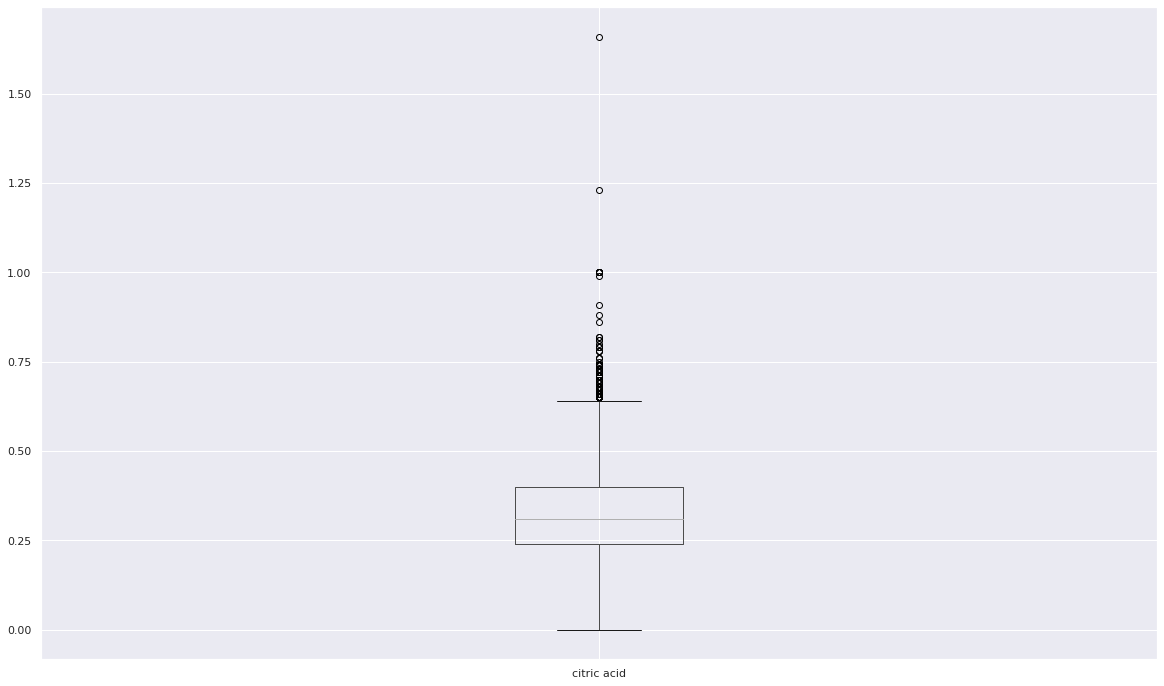

In [218]:
df.boxplot(column = 'citric acid');

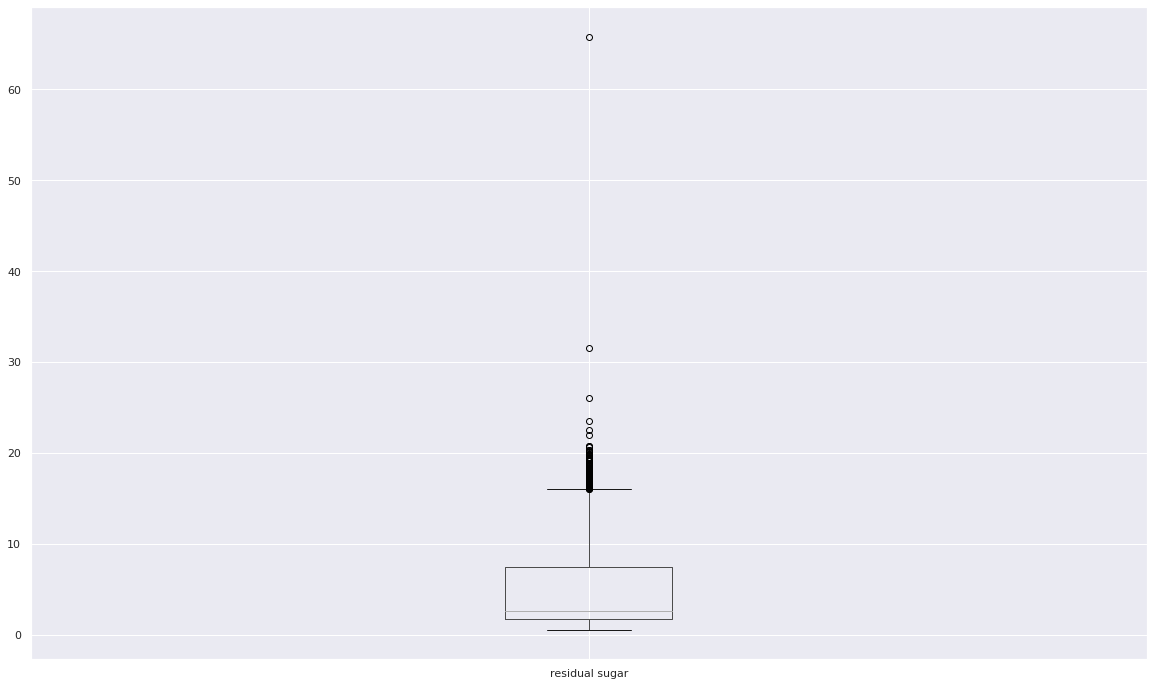

In [219]:
df.boxplot(column = 'residual sugar');

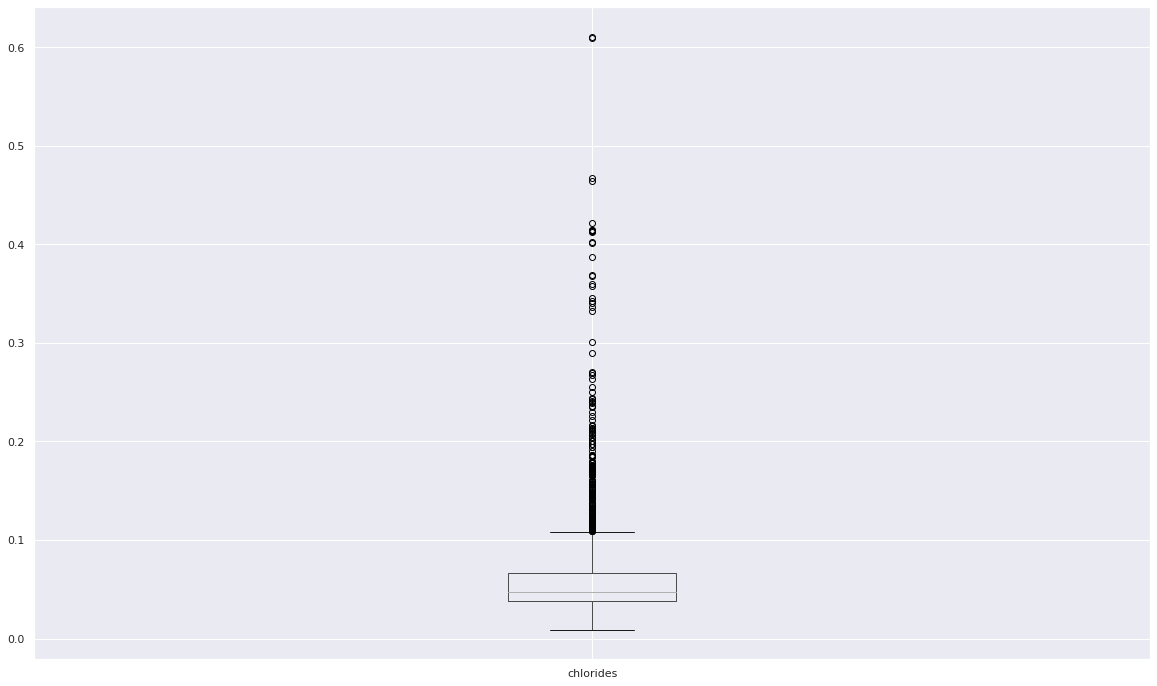

In [220]:
df.boxplot(column = 'chlorides');

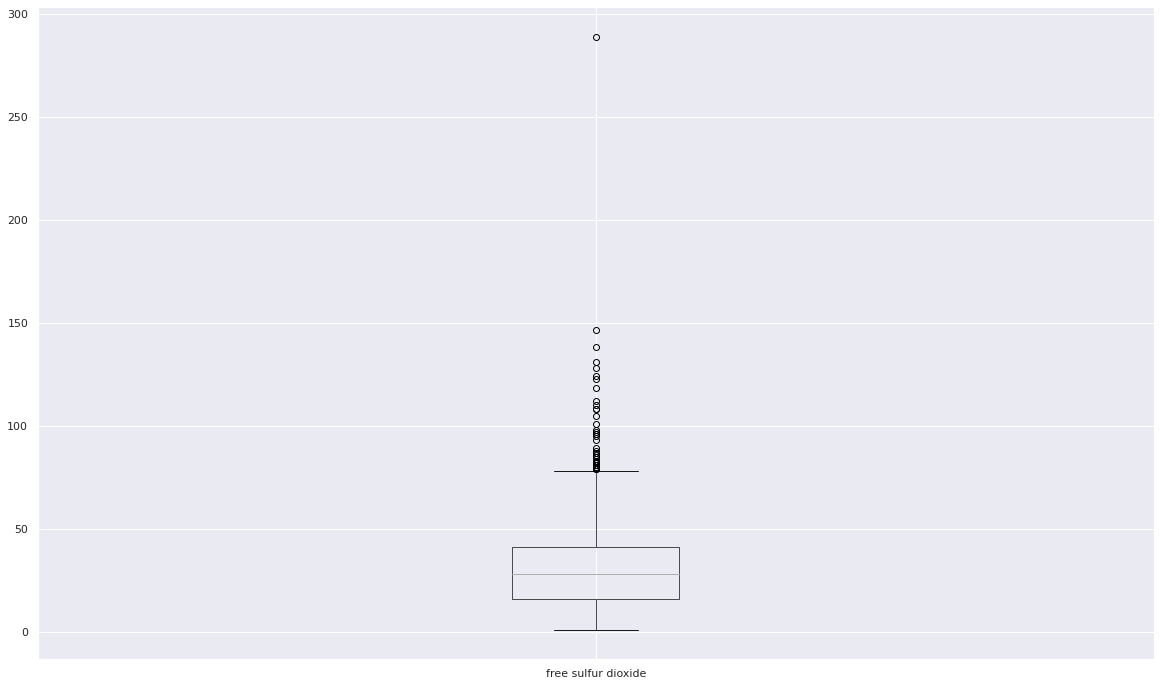

In [221]:
df.boxplot(column = 'free sulfur dioxide');

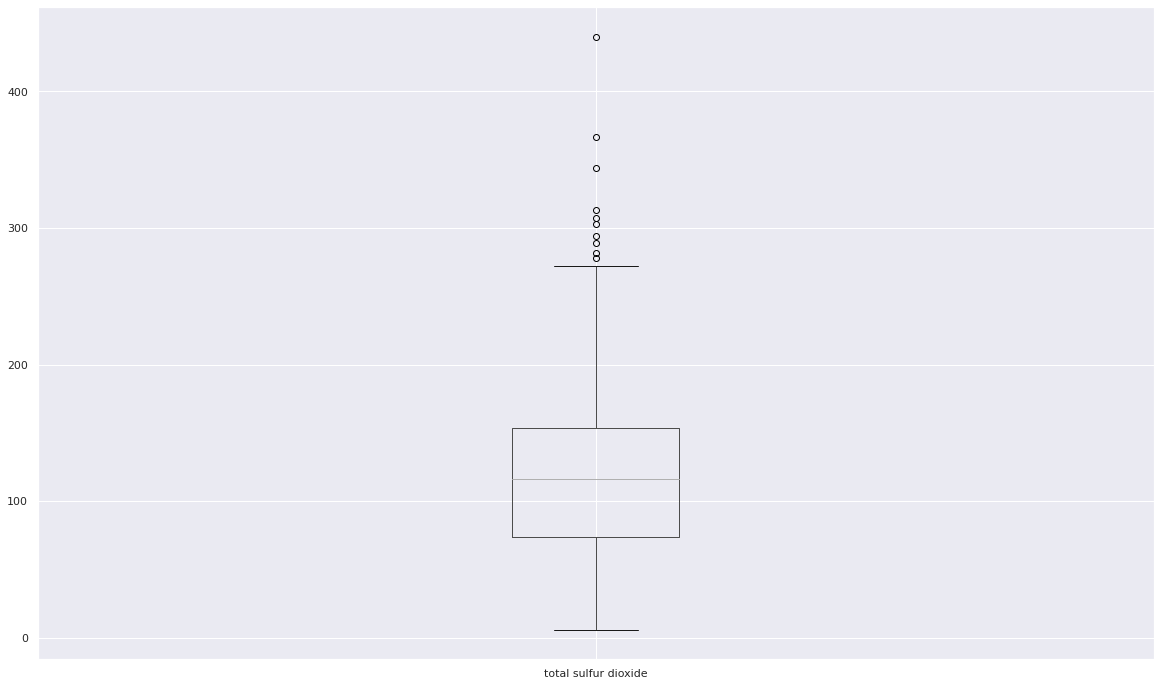

In [222]:
df.boxplot(column = 'total sulfur dioxide');

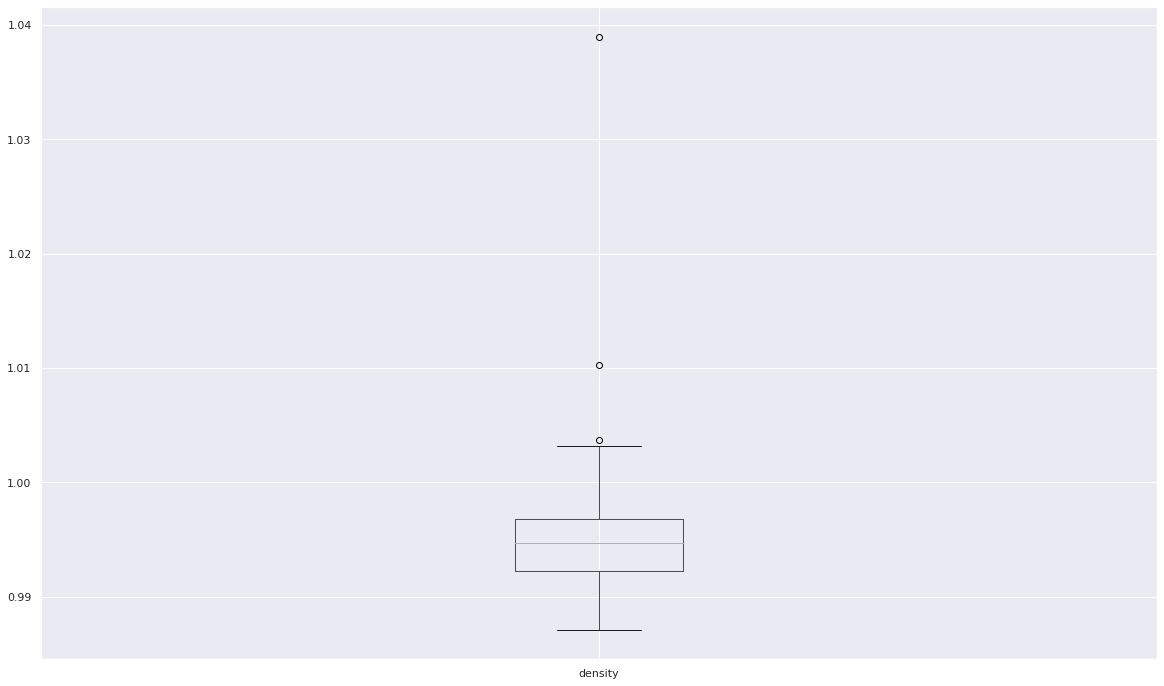

In [223]:
df.boxplot(column = 'density');

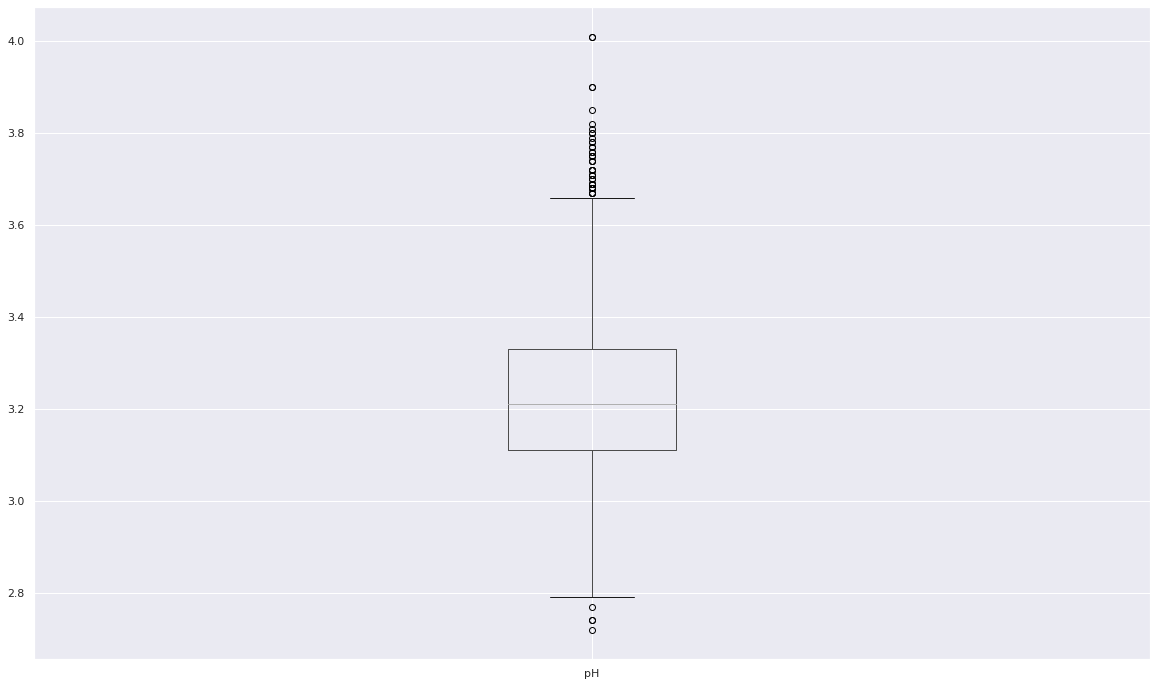

In [224]:
df.boxplot(column = 'pH');

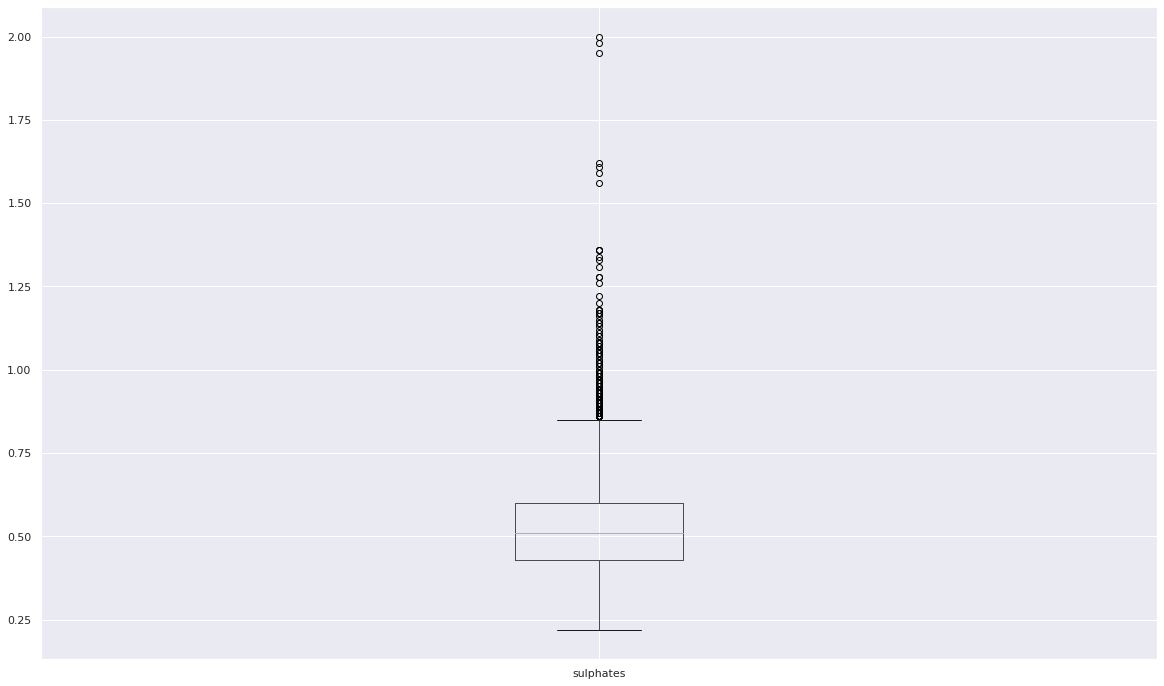

In [225]:
df.boxplot(column = 'sulphates');

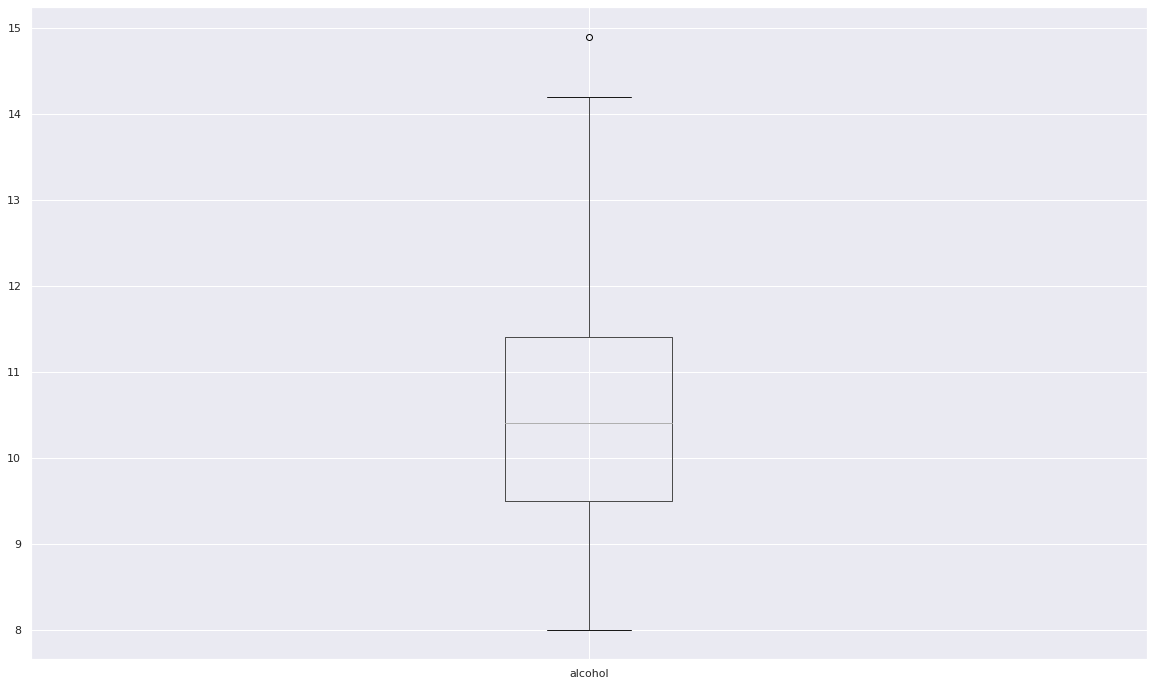

In [226]:
df.boxplot(column = 'alcohol');

According to our boxplots, there are substantial numbers of outliers within several of our columns; however, none of them seem unreasonable. Additionally, there are significantly more white wines in our data set than there are reds. We will have to take steps to ebsure our split data is properly balanced.    

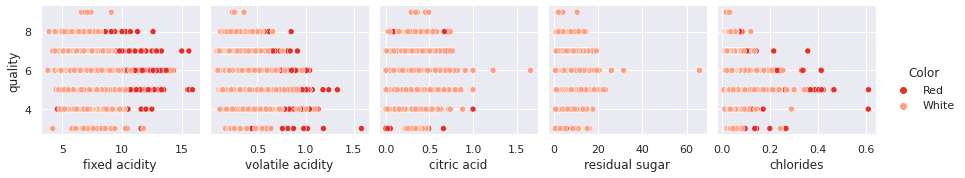

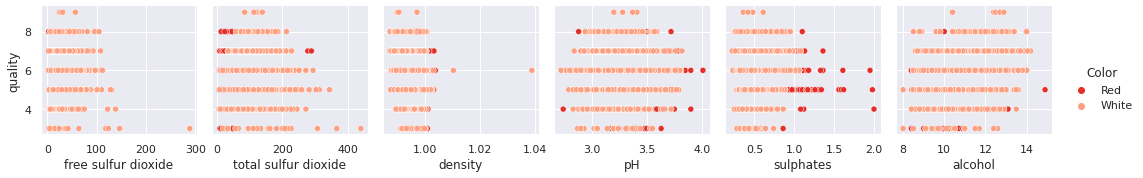

In [227]:
# This pairplot can help us get a sense of the relationships between each of our features and our target vector. 

sns.pairplot(df,
             x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'],
             y_vars = ['quality'],
             hue = 'Color',
             palette="Reds_r");

sns.pairplot(df,
             x_vars=['free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
             y_vars = ['quality'],
             hue = 'Color',
             palette="Reds_r");

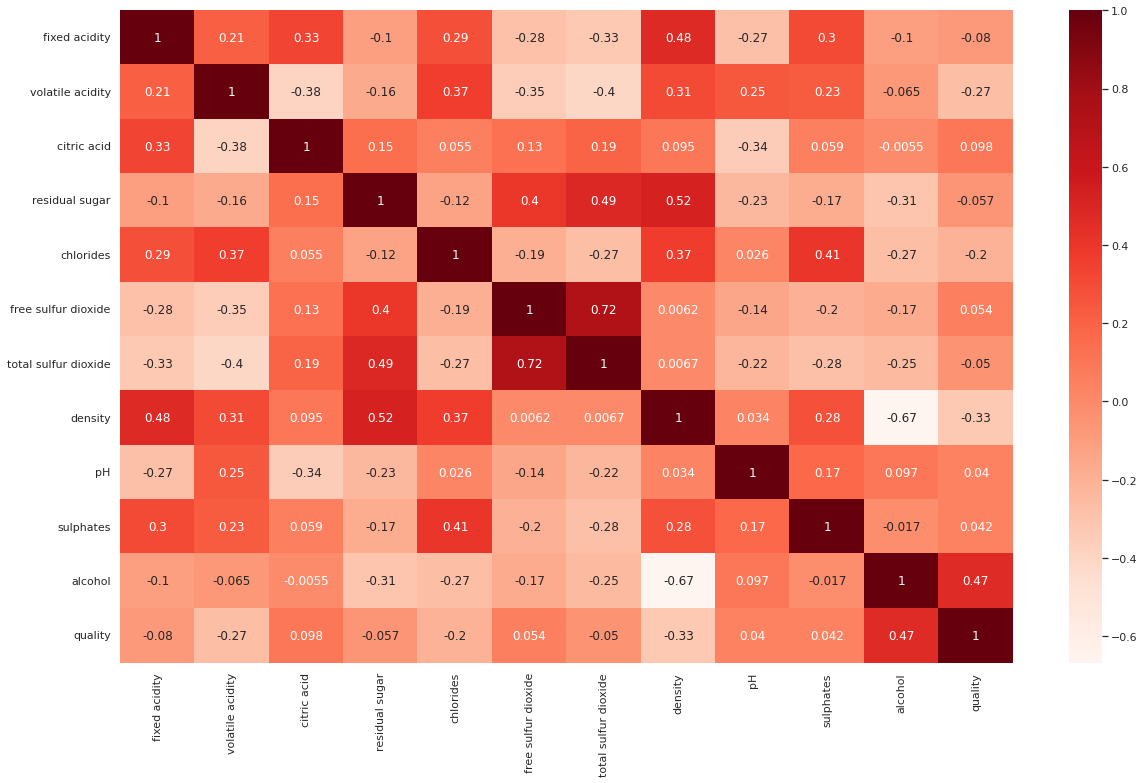

In [228]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap = 'Reds');
sns.set(rc={'figure.figsize':(20,12)})

The feature with the highest correlation to quality is the alcohol percentage. 

# **Data Processing**

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [268]:
# Train/Test Split

y = df['quality']
X = df.drop(columns=['quality'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [231]:
# We need to create a pipeline to transform our data and avoid data leakage 

from sklearn.pipeline import make_pipeline
cat_feat = make_column_selector(dtype_include='object')
num_feat = make_column_selector(dtype_include='number')
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')
scaler = StandardScaler()
num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, encoder)

num_tuple = (num_processor, num_feat)
cat_tuple = (cat_processor, cat_feat)

In [232]:
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [233]:
column_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f29a988e550>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.mak

# **Data Modeling**

In [234]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**K-Nearest Neighbors**

In [235]:
# Let's begin with a KNN Model

knn = KNeighborsRegressor()

knn_pipe = make_pipeline(column_transformer, knn)
knn_pipe.fit(X_train, y_train)
print('KNN Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_pipe.predict(X_train))))
print('KNN Testing RMSE:', np.sqrt(mean_squared_error(y_test, knn_pipe.predict(X_test))))
print('-----')
print('KNN Training R2:', r2_score(y_train, knn_pipe.predict(X_train)))
print('KNN Testing R2:', r2_score(y_test, knn_pipe.predict(X_test)))

KNN Training RMSE: 0.6003424252615521
KNN Testing RMSE: 0.7452506264610593
-----
KNN Training R2: 0.5343037955779726
KNN Testing R2: 0.28211229495199586


In [236]:
# We can tune our hyperparameters to see if we can get a better score

knn_params = {'kneighborsregressor__n_neighbors' : [3,5,7,9],
              'kneighborsregressor__leaf_size' : [15, 20, 30]}

In [237]:
knn_gs = GridSearchCV(knn_pipe, knn_params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f29a988e550>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [238]:
knn_gs.best_params_

{'kneighborsregressor__leaf_size': 15, 'kneighborsregressor__n_neighbors': 9}

In [239]:
print('KNN_GS Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_gs.predict(X_train))))
print('KNN_GS Testing RMSE:', np.sqrt(mean_squared_error(y_test, knn_gs.predict(X_test))))
print('-----')
print('KNN_GS Training R2:', r2_score(y_train, knn_gs.predict(X_train)))
print('KNN_GS Testing R2:', r2_score(y_test, knn_gs.predict(X_test)))

KNN_GS Training RMSE: 0.6423992166966163
KNN_GS Testing RMSE: 0.7233555788260239
-----
KNN_GS Training R2: 0.4667699290256606
KNN_GS Testing R2: 0.32367492955651034


Our score has improved slightly, but another model may prove to be more accurate. Let's try a random forest regressor.

**Random Forest Regressor**

In [240]:
rf = RandomForestRegressor(random_state=42)
rf_pipe = make_pipeline(column_transformer, rf)
rf_pipe.fit(X_train, y_train)

train_preds = rf_pipe.predict(X_train)
test_preds = rf_pipe.predict(X_test)

print('RF Training RMSE:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('RF Testing RMSE:', np.sqrt(mean_squared_error(y_test, test_preds)))
print('-----')
print('RF Training R2:', r2_score(y_train, train_preds))
print('RF Testing R2:', r2_score(y_test, test_preds))

RF Training RMSE: 0.26126331794428803
RF Testing RMSE: 0.6863802843445039
-----
RF Training R2: 0.9118014381945941
RF Testing R2: 0.39105030613340974


This model is already more accurate than our KNN model. Let's tune the model to see if we can do better.

In [241]:
rf_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f29a988e550>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <skle

In [242]:
rf_params = {'randomforestregressor__n_estimators' : [100, 300, 500],
             'randomforestregressor__min_samples_split' : [2,4]}

In [243]:
rf_gs = GridSearchCV(rf_pipe, rf_params)
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f29a988e550>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [244]:
rf_gs.best_params_

{'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 500}

In [245]:
best_rf = rf_gs.best_estimator_
train_preds = best_rf.predict(X_train)
test_preds = best_rf.predict(X_test)

print('RF Train RMSE:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('RF Test RMSE:', np.sqrt(mean_squared_error(y_test, test_preds)))
print('-----')
print('RF Train R2:', r2_score(y_train, train_preds))
print('RF Test R2:', r2_score(y_test, test_preds))

RF Train RMSE: 0.25435701627697105
RF Test RMSE: 0.6868334641809446
-----
RF Train R2: 0.9164027345744584
RF Test R2: 0.3902459274793738


This is a slight improvement, but still not ideal. A decision tree classifier may prove to be the most accurate. 

**Decision Tree Classifier**

In [246]:
from sklearn.tree import DecisionTreeClassifier
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Red,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Red,5


In [247]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [262]:
dec_tree_pipe = make_pipeline(column_transformer, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f29a988e550>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                   

In [249]:
dec_tree_pipe.predict(X_test)

array([7, 5, 7, ..., 5, 6, 6])

In [250]:
train_score = dec_tree_pipe.score(X_train, y_train)
test_score = dec_tree_pipe.score(X_test, y_test)
print('Dec Tree Training RMSE:', np.sqrt(mean_squared_error(y_train, dec_tree_pipe.predict(X_train))))
print('Dec Tree Testing RMSE:', np.sqrt(mean_squared_error(y_test, dec_tree_pipe.predict(X_test))))
print('-----')
print('Dec Tree Training Score:', train_score)
print('Dec Tree Testing Score:', test_score)

Dec Tree Training RMSE: 0.0
Dec Tree Testing RMSE: 1.0022531008659883
-----
Dec Tree Training Score: 1.0
Dec Tree Testing Score: 0.45263157894736844


Looks like this model is overfit, lets make some adjustments. 

In [251]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [252]:
dec_tree.get_depth()

25

In [253]:
dec_tree.get_n_leaves()

1257

In [272]:
# The graph below helps us determine the optimal max depth of our decision tree by plotting the R2 score for a range of max depth values. 

max_depth_range = list(range(2,25))
r2 = []
for depth in max_depth_range:
  dec_tree = DecisionTreeClassifier(max_depth=depth,
                                    random_state=42)
  dec_tree.fit(X_train, y_train)
  score = dec_tree.score(X_test, y_test)
  r2.append(score)

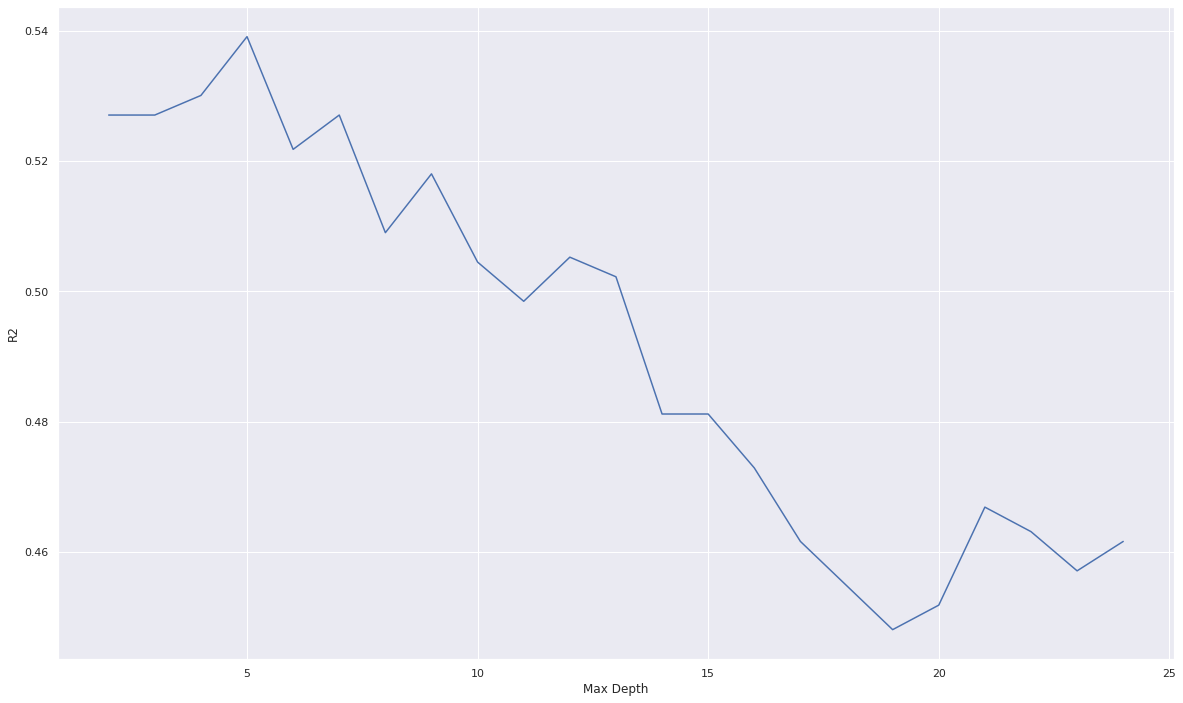

In [273]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('Max Depth')
plt.ylabel('R2');

According to the plot, our optimal max depth is 5. Let's see how this effects our accuracy.

In [275]:
dec_tree_5 = DecisionTreeClassifier(max_depth = 5, random_state=42)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print('Optimal Dec Tree Train RMSE:', np.sqrt(mean_squared_error(y_train, dec_tree_pipe.predict(X_train))))
print('Optimal Dec Tree Test RMSE:', np.sqrt(mean_squared_error(y_test, dec_tree_pipe.predict(X_test))))
print('-----')
print('Optimal Dec Tree Train Score:', train_5_score)
print('Optimal Dec Tree Test Score:', test_5_score)

Optimal Dec Tree Train RMSE: 0.01583118967153259
Optimal Dec Tree Test RMSE: 0.9859921151448523
-----
Optimal Dec Tree Train Score: 0.5741854636591479
Optimal Dec Tree Test Score: 0.5390977443609023


In the end, our **Optimized Decision Tree** is the most accurate model we have prepared. The important thing to remember is that wine quality is a subjective variable, and sommeliers will often disagree wildly on a wines true quality, if such a thing even exists. Our model is getting close to predicting quality accurately, based on physiochemical properties, but the truth is the correlation between these properties and the enjoyability of a wine is subjective, and therefore difficult for a model to accurately predict. 